In [1]:
#Importing necessary libraries
import pandas as pd 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.colors as mcolors

In [2]:
# Reading the CSV files 
df = pd.read_csv("C:/Users/Me/Downloads/datasets/supermarket_sales.csv")
df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


<h3>Data Cleaning </h3>


In [3]:
df.shape

(1000, 17)

In [4]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [5]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [6]:
# Convert 'DateTime' column to datetime type
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

In [7]:
# Extract month from 'Date' column and store it in a new column named 'Month'
df['Month'] = df['Date'].dt.month
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6,3
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3,2


In [8]:
# Extract day from 'Date' column and store it in a new column named 'Day'
df['Day'] = df['Date'].dt.day
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month,Day
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1,1,5
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6,3,8
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4,3,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4,1,27
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3,2,8


In [9]:
# Convert 'Time' column to datetime type and extract hours from it
df['Time'] = pd.to_datetime(df['Time'])

# Extract hour from 'Time' column and store it in a new column named 'Hour'
df['Hour'] = df['Time'].dt.hour
df.head()

C:\Users\Me\AppData\Local\Temp\ipykernel_20696\1158226196.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month,Day,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2024-05-02 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,1,5,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2024-05-02 10:29:00,Cash,76.40,4.761905,3.8200,9.6,3,8,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2024-05-02 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,3,3,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2024-05-02 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,1,27,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2024-05-02 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,2,8,10


In [10]:
#Dropping invoice column 
df.drop(columns=['Invoice ID','Time'],inplace=True)
df.head(5)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross margin percentage,gross income,Rating,Month,Day,Hour
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,Ewallet,522.83,4.761905,26.1415,9.1,1,5,13
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,Cash,76.40,4.761905,3.8200,9.6,3,8,10
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,Credit card,324.31,4.761905,16.2155,7.4,3,3,13
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,Ewallet,465.76,4.761905,23.2880,8.4,1,27,20
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,Ewallet,604.17,4.761905,30.2085,5.3,2,8,10


In [11]:
# Rename the column total to 'Revenue'
df.rename(columns={'Total': 'Revenue', 'cogs':'Cost of Good Sold', 'gross income':'Gross Income', 'gross margin percentage':'Gross Margin Percentage'}, inplace=True)
df.head(5)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Revenue,Date,Payment,Cost of Good Sold,Gross Margin Percentage,Gross Income,Rating,Month,Day,Hour
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,Ewallet,522.83,4.761905,26.1415,9.1,1,5,13
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,Cash,76.40,4.761905,3.8200,9.6,3,8,10
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,Credit card,324.31,4.761905,16.2155,7.4,3,3,13
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,Ewallet,465.76,4.761905,23.2880,8.4,1,27,20
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,Ewallet,604.17,4.761905,30.2085,5.3,2,8,10


In [12]:
total_sum = round(df.groupby('City')[['Revenue', 'Cost of Good Sold','Tax 5%','Gross Income','Quantity']].sum(), 2)
total_sum


,Revenue,Cost of Good Sold,Tax 5%,Gross Income,Quantity
City,,,,,
Mandalay,106197.67,101140.64,5057.03,5057.03,1820
Naypyitaw,110568.71,105303.53,5265.18,5265.18,1831
Yangon,106200.37,101143.21,5057.16,5057.16,1859


In [13]:
#Total revenue generated per gender 
Revenue_per_Gender =round(df.groupby('Gender')[['Revenue', 'Gross Income']].sum(), 2)
Revenue_per_Gender


,Revenue,Gross Income
Gender,,
Female,167882.92,7994.42
Male,155083.82,7384.94


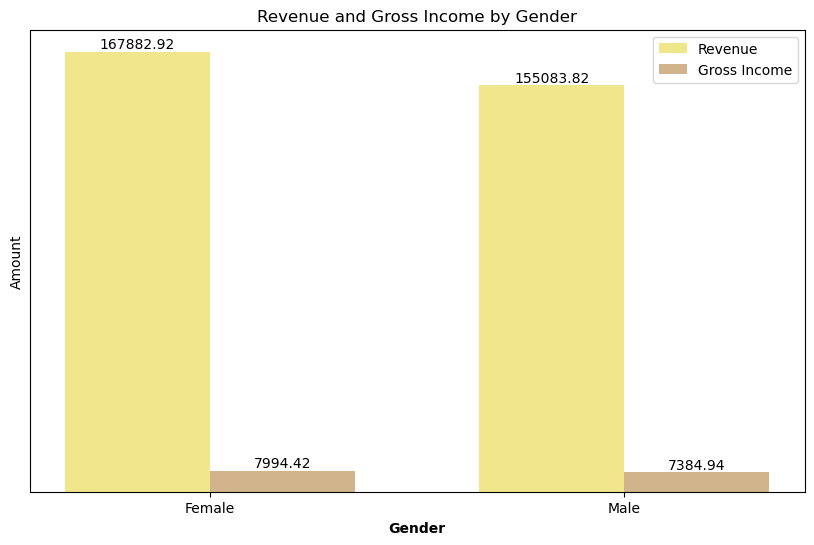

In [14]:
# Extracting the labels and values for the bar chart
labels = Revenue_per_Gender.index
revenue_values = Revenue_per_Gender['Revenue'] 
gross_income_values = Revenue_per_Gender['Gross Income'] 

# Set the width of the bars
bar_width = 0.35

# Set the position of the bars on the x-axis
r1 = range(len(labels))
r2 = [x + bar_width for x in r1]

# Creating the bar chart
plt.figure(figsize=(10, 6))
bars1 = plt.bar(r1, revenue_values, color='khaki', width=bar_width,  label='Revenue')
bars2 = plt.bar(r2, gross_income_values, color='tan', width=bar_width, label='Gross Income')

# Adding labels and title
plt.xlabel('Gender', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(labels))], labels)
plt.ylabel('Amount')
plt.title('Revenue and Gross Income by Gender')

# Removing y-axis ticks
plt.yticks([])

# Adding values at the top of each bar
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, '%.2f' % height, ha='center', va='bottom')

# Adding legend
plt.legend()

# Show plot
plt.show()

In [15]:
#Total Revenue generated per city
Revenue_per_City =round(df.groupby('City')[['Revenue', 'Cost of Good Sold']].sum(), 1)
Revenue_per_City

,Revenue,Cost of Good Sold
City,,
Mandalay,106197.7,101140.6
Naypyitaw,110568.7,105303.5
Yangon,106200.4,101143.2


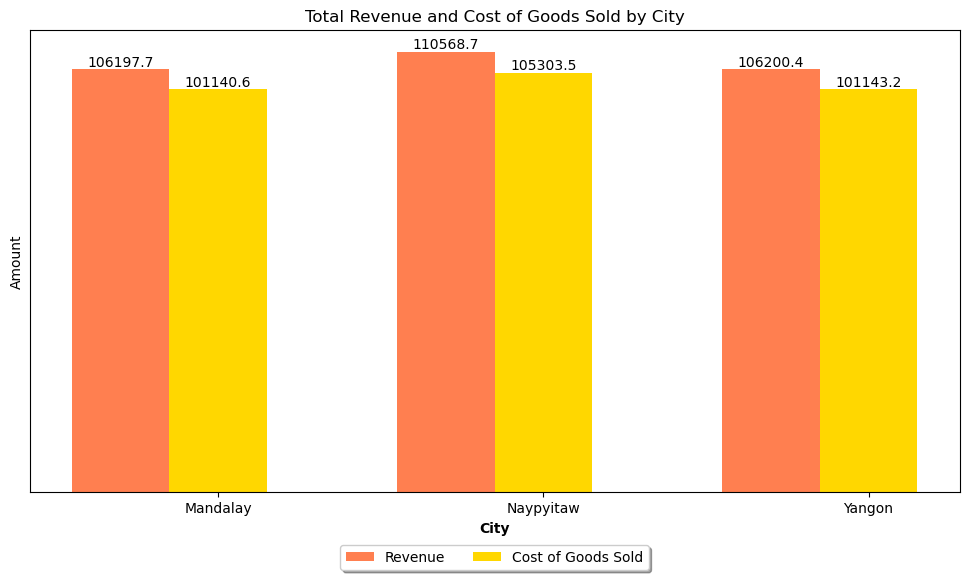

In [16]:
labels = Revenue_per_City.index
revenue_values = Revenue_per_City['Revenue'] 
cost_of_good_sold =  Revenue_per_City['Cost of Good Sold']

# Set the width of the bars
bar_width = 0.3

# Set the position of the bars on the x-axis
r1 = range(len(labels))
r2 = [x + bar_width for x in r1]
# Creating the bar chart
plt.figure(figsize=(12, 6))
bars1 = plt.bar(r1, revenue_values, color='coral', width=bar_width, label='Revenue')
bars2 = plt.bar(r2, cost_of_good_sold, color='gold', width=bar_width,  label='Cost of Goods Sold')

# Adding labels and title
plt.xlabel('City', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(labels))], labels)
plt.ylabel('Amount')
plt.title('Total Revenue and Cost of Goods Sold by City')

# Removing y-axis ticks
plt.yticks([])
# Adding values at the top of each bar
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, '%.1f' % height, ha='center', va='bottom')

# Adding legend outside the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=4)

# Show plot
plt.show()

In [17]:
df['Customer type'].value_counts()

Customer type
Member    501
Normal    499
Name: count, dtype: int64

In [18]:
df['Payment'].value_counts()

Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64

In [19]:
#Revenue Generated by product line 
Revenue_per_Product_line =round(df.groupby('Product line')[['Revenue']].sum(), 1)
Revenue_per_Product_line

,Revenue
Product line,
Electronic accessories,54337.5
Fashion accessories,54305.9
Food and beverages,56144.8
Health and beauty,49193.7
Home and lifestyle,53861.9
Sports and travel,55122.8


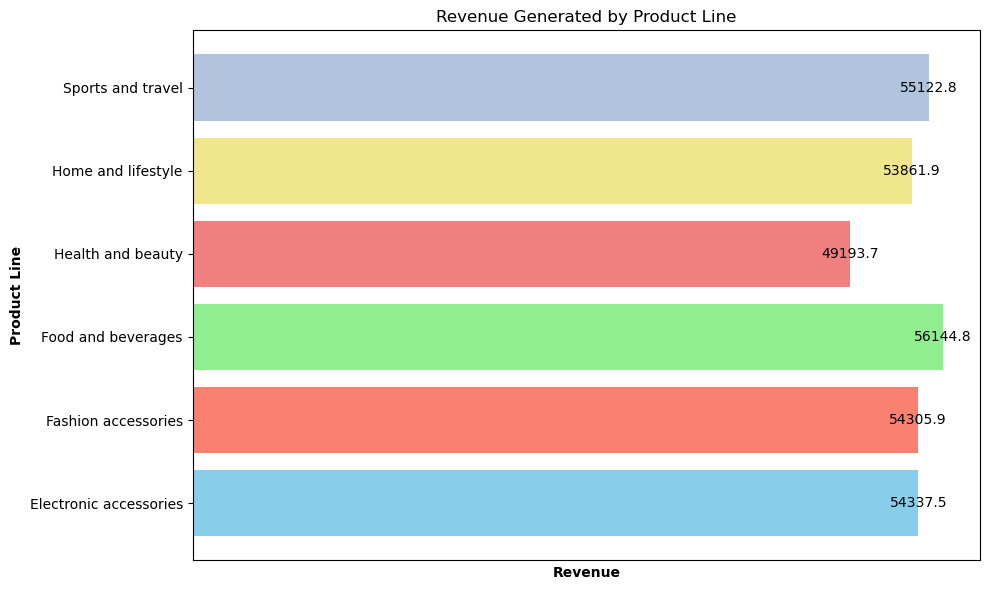

In [20]:
# Extracting the labels and values for the bar chart
labels = Revenue_per_Product_line.index
revenue_values = Revenue_per_Product_line['Revenue']

# Define colors for each bar
colors = ['skyblue', 'salmon', 'lightgreen', 'lightcoral', 'khaki', 'lightsteelblue', 'lightpink']

# Creating the vertical bar chart with custom colors
plt.figure(figsize=(10, 6))
bars = plt.barh(labels, revenue_values, color=colors)

# Adding labels and title
plt.xlabel('Revenue', fontweight='bold')
plt.ylabel('Product Line', fontweight='bold')
plt.title('Revenue Generated by Product Line')

# Removing y-axis ticks
plt.xticks([])

# Adding values inside each bar
for bar, value in zip(bars, revenue_values):
    plt.text(bar.get_width() - 0.5, bar.get_y() + bar.get_height()/2, str(value), ha='center', va='center', color='black')

# Show plot
plt.tight_layout()
plt.show()

In [21]:
# Sort the DataFrame by 'Revenue' column in descending order and select the top 10 entries
Revenue_per_Day =round(df.groupby('Day')[['Revenue']].sum(), 1)
top_10_days = Revenue_per_Day.sort_values(by='Revenue', ascending=False).head(10)
top_10_days

,Revenue
Day,
15,15717.5
19,14883.2
9,13767.3
14,13635.3
8,13503.8
27,13398.2
5,12798.7
2,12646.8
23,12428.8


In [45]:
#Sort the data by 'Revenue' in descending order and select the worst 10 days of sales
Revenue_per_Day =round(df.groupby('Day')[['Revenue']].sum(), 1)
worst_10_days = Revenue_per_Day.sort_values(by='Revenue', ascending=True).head(10)
worst_10_days

,Revenue
Day,
31,5232.5
13,5449.0
18,5569.3
21,5663.4
30,7045.3
22,7326.2
29,7539.8
4,7957.6
26,8828.2


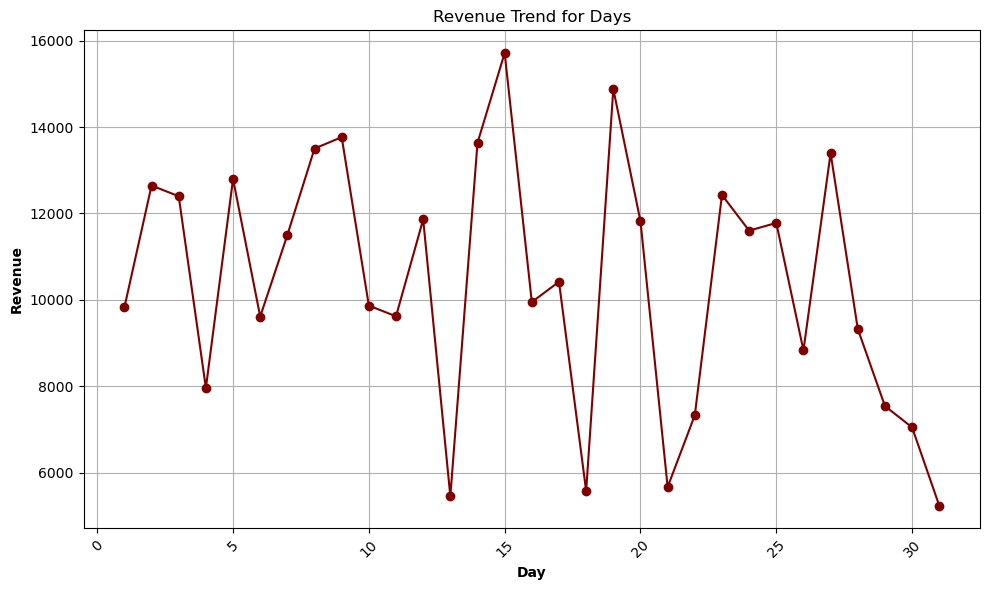

In [34]:
# Extracting the days and revenue values for the line chart
days = Revenue_per_Day.index
revenue = Revenue_per_Day['Revenue']

# Creating the line chart
plt.figure(figsize=(10, 6))
plt.plot(days, revenue, marker='o', color='maroon', linestyle='-')

# Adding labels and title
plt.xlabel('Day', fontweight='bold')
plt.ylabel('Revenue', fontweight='bold')
plt.title('Revenue Trend for Days')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [24]:
# Revenue per month
Revenue_per_Month =round(df.groupby('Month')[['Revenue']].sum(), 1)
Revenue_per_Month

,Revenue
Month,
1,116291.9
2,97219.4
3,109455.5


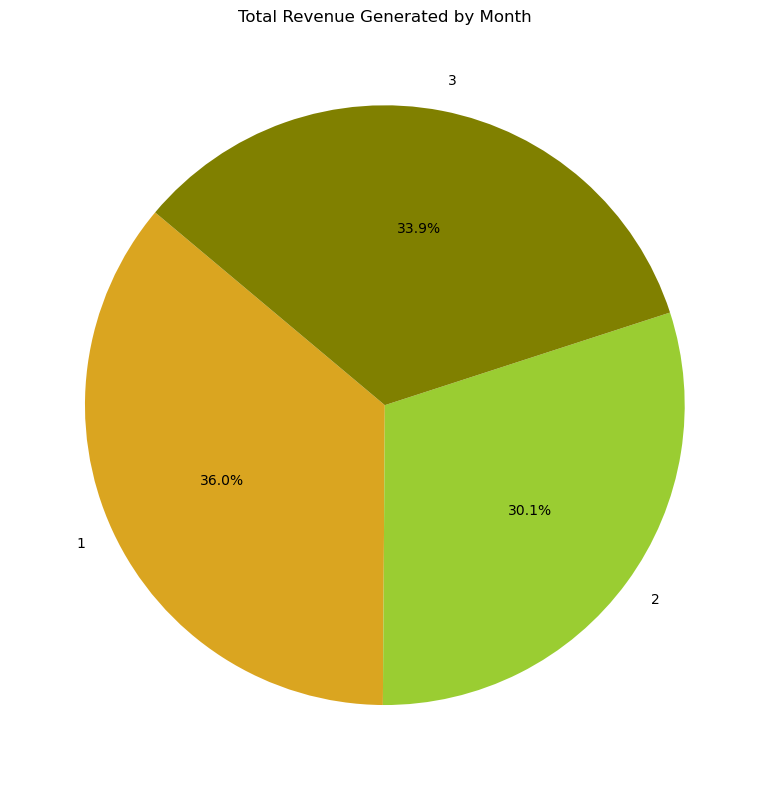

In [33]:
# Extracting the months and revenue values for the pie chart
months = Revenue_per_Month.index
revenue = Revenue_per_Month['Revenue']

# Define custom colors for the pie chart
colors = ['goldenrod', 'yellowgreen', 'olive']

# Creating the pie chart
plt.figure(figsize=(8, 8))
plt.pie(revenue, labels=months, autopct='%1.1f%%', startangle=140, colors=colors)

# Adding title
plt.title('Total Revenue Generated by Month')

# Show plot
plt.tight_layout()
plt.show()

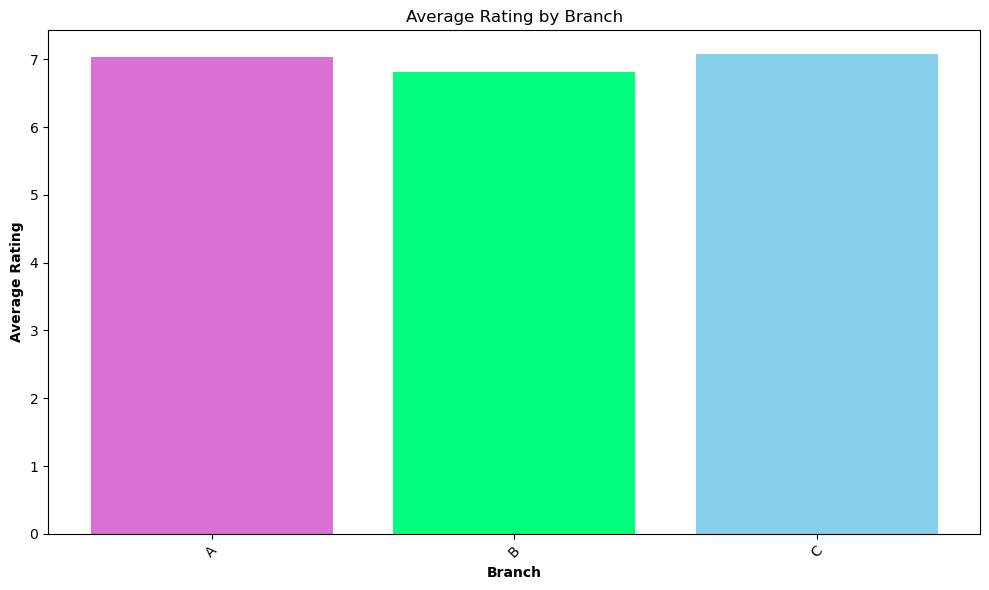

In [44]:
# Average rating per supermarket branch
average_ratings = df.groupby('Branch')['Rating'].mean()

# Creating the bar chart
plt.figure(figsize=(10, 6))
colors = ['orchid', 'springgreen', 'skyblue']
plt.bar(average_ratings.index, average_ratings, color=colors)

# Adding labels and title
plt.xlabel('Branch', fontweight='bold')
plt.ylabel('Average Rating', fontweight='bold')
plt.title('Average Rating by Branch')

# Show plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()